In [766]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [767]:
df = pd.read_excel('df.xlsx')

In [768]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14081 entries, 0 to 14080
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      14081 non-null  int64         
 1   Promo_start     14081 non-null  datetime64[ns]
 2   Promo_end       14081 non-null  datetime64[ns]
 3   Shipping_start  14081 non-null  datetime64[ns]
 4   Shipping_end    14081 non-null  datetime64[ns]
 5   Promo_type      14081 non-null  object        
 6   Feat_2          14081 non-null  float64       
 7   Feat_3          14081 non-null  float64       
 8   Agent           14081 non-null  object        
 9   Promo_id        14081 non-null  object        
 10  Item_id         14081 non-null  object        
 11  Feat_7          6668 non-null   float64       
 12  Promo_class     14081 non-null  object        
 13  Feat_9          5881 non-null   float64       
 14  Feat_10         6639 non-null   float64       
 15  Fe

In [769]:
df.head(10)

,Unnamed: 0,Promo_start,Promo_end,Shipping_start,Shipping_end,Promo_type,Feat_2,Feat_3,Agent,Promo_id,Item_id,Feat_7,Promo_class,Feat_9,Feat_10,Feat_11,Feat_12,Target
0,0,2020-01-06,2020-01-12,2019-12-16,2020-01-15,L,8583.448739,33.335849,B,Promo №20.0,Item ID: 22.0,NaN,D,NaN,NaN,NaN,58379,4102
1,1,2020-01-06,2020-01-12,2019-12-16,2020-01-15,L,29944.602677,64.447170,B,Promo №19.0,Item ID: 62.0,NaN,D,NaN,NaN,NaN,73433,13311
2,2,2020-01-06,2020-01-12,2019-12-16,2020-01-15,L,5474.685269,64.447170,B,Promo №20.0,Item ID: 71.0,NaN,D,NaN,NaN,NaN,35067,1887
3,3,2020-01-06,2020-01-12,2019-12-16,2020-01-15,L,8583.448739,33.335849,B,Promo №20.0,Item ID: 31.0,NaN,D,NaN,NaN,NaN,36550,2346
4,4,2020-01-06,2020-01-12,2019-12-16,2020-01-15,L,6370.475595,51.994340,B,Promo №20.0,Item ID: 23.0,NaN,D,NaN,NaN,NaN,30909,4817
5,5,2020-01-08,2020-01-14,2019-12-11,2020-01-03,L,33233.142608,58.220755,C,Promo №25.0,Item ID: 108.0,NaN,D,NaN,NaN,NaN,17217,157
6,6,2020-01-08,2020-01-14,2019-12-20,2020-01-03,L,6310.844582,37.466038,C,Promo №40.0,Item ID: 57.0,NaN,D,NaN,NaN,NaN,42589,1124
7,7,2020-01-08,2020-01-14,2019-12-14,2020-01-03,L,6335.138699,47.843396,C,Promo №0.0,Item ID: 32.0,NaN,D,NaN,NaN,NaN,79017,10387
8,8,2020-01-08,2020-02-12,2019-12-12,2020-02-01,L,15012.555347,78.975472,C,Promo №27.0,Item ID: 130.0,NaN,D,NaN,NaN,NaN,35945,10672
9,9,2020-01-08,2020-01-21,2019-12-11,2020-01-10,L,18764.892045,47.843396,C,Promo №24.0,Item ID: 82.0,NaN,D,NaN,NaN,NaN,58105,548


In [770]:
df['Promo_duration'] = (df['Promo_end'] - df['Promo_start']).dt.days
df['Shipping_duration'] = (df['Shipping_end'] - df['Shipping_start']).dt.days
df['Right_offset'] = (df['Shipping_end'] - df['Promo_end']).dt.days
df['Left_offset'] = (df['Shipping_start'] - df['Promo_end']).dt.days
df['Promo_heart'] = (df['Promo_start'] + (df['Promo_end'] - df['Promo_start']) // 2)
df['Day_sin'] = np.sin(2 * np.pi * df['Promo_heart'].dt.dayofyear/365)
df['Day_cos'] = np.cos(2 * np.pi * df['Promo_heart'].dt.dayofyear/365)

print(df[['Promo_duration', 'Shipping_duration', 'Right_offset', 'Left_offset']].describe())

       Promo_duration  Shipping_duration  Right_offset  Left_offset
count    14081.000000       14081.000000  14081.000000  14081.00000
mean        11.197003          30.431645     -4.158014    -34.58966
std          8.202236           9.890108      6.089807      8.86566
min          0.000000           0.000000    -63.000000    -84.00000
25%          6.000000          25.000000     -9.000000    -35.00000
50%          6.000000          30.000000      0.000000    -35.00000
75%         13.000000          35.000000      0.000000    -30.00000
max         96.000000          97.000000     29.000000      1.00000


In [771]:
categorical_cols = ['Promo_type', 'Agent', 'Promo_class']
for col in categorical_cols:
    print(df[col].value_counts(normalize=True), '\n')

Promo_type
J    0.420567
L    0.246644
A    0.172573
G    0.084795
F    0.060578
E    0.007670
B    0.004900
H    0.001775
I    0.000213
D    0.000142
C    0.000142
Name: proportion, dtype: float64 

Agent
C    0.736524
B    0.159435
A    0.104041
Name: proportion, dtype: float64 

Promo_class
D    0.991691
B    0.006392
C    0.001917
Name: proportion, dtype: float64 



              Feat_2        Feat_3         Feat_7        Feat_9       Feat_10  \
count   14081.000000  14081.000000    6668.000000  5.881000e+03  6.639000e+03   
mean    20690.872229     58.069871   28989.782082  3.259155e+07  8.418666e+06   
std     15733.839413     10.975746   31205.599052  2.977224e+07  1.336510e+07   
min         1.000000      1.000000       1.000000  1.000000e+00  1.000000e+00   
25%      7989.347166     51.101144    2301.448762  9.272255e+06  7.373121e+05   
50%     14425.079443     58.220755   11094.707456  2.538238e+07  2.682487e+06   
75%     33042.765078     62.454717   54930.901549  3.816733e+07  1.034888e+07   
max    100000.000000    100.000000  100000.000000  1.000000e+08  1.000000e+08   

           Feat_11       Feat_12         Target  
count  6639.000000  14081.000000   14081.000000  
mean     25.188755  50023.053334    3239.999787  
std      19.251053  28834.399072    6534.079963  
min       1.000000     15.000000       1.000000  
25%       8.942693  

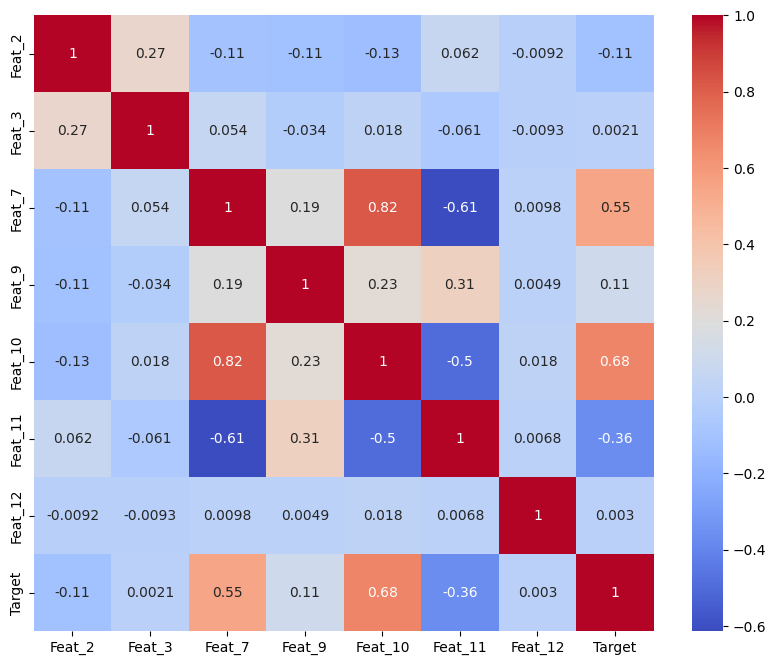

In [772]:
numeric_cols = ['Feat_2', 'Feat_3', 'Feat_7', 'Feat_9', 'Feat_10', 'Feat_11', 'Feat_12', 'Target']
print(df[numeric_cols].describe())

plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

Target
126      45
56       42
101      42
140      41
70       38
         ..
7528      1
12364     1
29935     1
3401      1
75172     1
Name: count, Length: 5414, dtype: int64


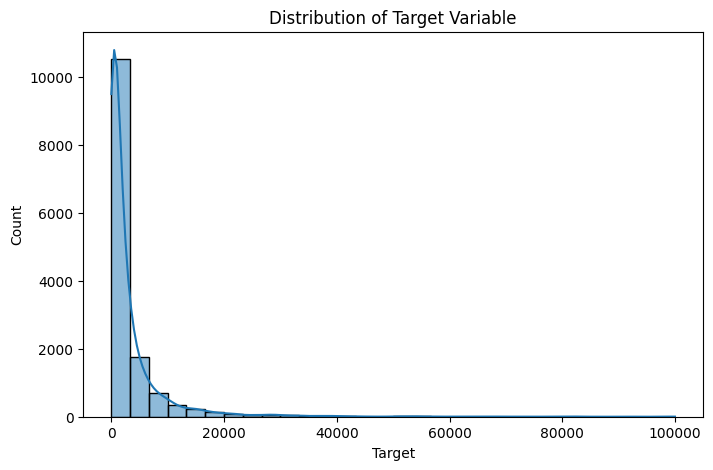

In [773]:
print(df['Target'].value_counts())

plt.figure(figsize=(8, 5))
sns.histplot(df['Target'], bins=30, kde=True)
plt.title('Distribution of Target Variable')
plt.show()

In [774]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100
print(pd.concat([missing, missing_percent], axis=1, keys=['Total', 'Percent']))

                   Total    Percent
Feat_9              8200  58.234500
Feat_10             7442  52.851360
Feat_11             7442  52.851360
Feat_7              7413  52.645409
Shipping_end           0   0.000000
Promo_start            0   0.000000
Promo_end              0   0.000000
Shipping_start         0   0.000000
Unnamed: 0             0   0.000000
Agent                  0   0.000000
Feat_3                 0   0.000000
Feat_2                 0   0.000000
Promo_type             0   0.000000
Promo_class            0   0.000000
Item_id                0   0.000000
Promo_id               0   0.000000
Feat_12                0   0.000000
Target                 0   0.000000
Promo_duration         0   0.000000
Shipping_duration      0   0.000000
Right_offset           0   0.000000
Left_offset            0   0.000000
Promo_heart            0   0.000000
Day_sin                0   0.000000
Day_cos                0   0.000000


In [775]:
df_encoded = pd.get_dummies(df, columns=['Promo_type', 'Promo_class', 'Agent'], drop_first=True)

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded = ohe.fit_transform(df[['Promo_type', 'Promo_class', 'Agent']])
df_encoded = pd.concat([df, pd.DataFrame(encoded, columns=ohe.get_feature_names_out())], axis=1)

In [776]:
pd.get_dummies(df, columns=['Promo_type', 'Promo_class', 'Agent'], drop_first=True)

,Unnamed: 0,Promo_start,Promo_end,Shipping_start,Shipping_end,Feat_2,Feat_3,Promo_id,Item_id,Feat_7,...,Promo_type_F,Promo_type_G,Promo_type_H,Promo_type_I,Promo_type_J,Promo_type_L,Promo_class_C,Promo_class_D,Agent_B,Agent_C
0,0,2020-01-06,2020-01-12,2019-12-16,2020-01-15,8583.448739,33.335849,Promo №20.0,Item ID: 22.0,NaN,...,False,False,False,False,False,True,False,True,True,False
1,1,2020-01-06,2020-01-12,2019-12-16,2020-01-15,29944.602677,64.447170,Promo №19.0,Item ID: 62.0,NaN,...,False,False,False,False,False,True,False,True,True,False
2,2,2020-01-06,2020-01-12,2019-12-16,2020-01-15,5474.685269,64.447170,Promo №20.0,Item ID: 71.0,NaN,...,False,False,False,False,False,True,False,True,True,False
3,3,2020-01-06,2020-01-12,2019-12-16,2020-01-15,8583.448739,33.335849,Promo №20.0,Item ID: 31.0,NaN,...,False,False,False,False,False,True,False,True,True,False
4,4,2020-01-06,2020-01-12,2019-12-16,2020-01-15,6370.475595,51.994340,Promo №20.0,Item ID: 23.0,NaN,...,False,False,False,False,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14076,14076,2024-12-11,2024-12-17,2024-11-12,2024-12-17,10116.186625,60.296226,Promo №5836.0,Item ID: 24.0,NaN,...,True,False,False,False,False,False,False,True,False,True
14077,14077,2024-12-11,2024-12-17,2024-11-12,2024-12-17,15058.935024,60.296226,Promo №5836.0,Item ID: 26.0,NaN,...,True,False,False,False,False,False,False,True,False,True
14078,14078,2024-12-11,2024-12-17,2024-11-12,2024-12-17,10116.186625,60.296226,Promo №5836.0,Item ID: 27.0,NaN,...,True,False,False,False,False,False,False,True,False,True
14079,14079,2024-12-11,2024-12-17,2024-11-12,2024-12-17,45660.687398,47.843396,Promo №5823.0,Item ID: 48.0,NaN,...,False,False,False,False,True,False,False,True,False,True


In [777]:
# Создаем копию данных, чтобы не изменять оригинальный DataFrame
df_corr = df.copy()

# Кодируем категориальные переменные для корреляционного анализа
from sklearn.preprocessing import LabelEncoder

# Label Encoding для категориальных признаков (для корреляционного анализа)
cat_cols = ['Promo_type', 'Agent', 'Promo_class', 'Promo_id', 'Item_id']
le = LabelEncoder()
for col in cat_cols:
    if col in df_corr.columns:
        df_corr[col] = le.fit_transform(df_corr[col].astype(str))

# Заполняем пропуски медианой (для числовых переменных)
numeric_cols = df_corr.select_dtypes(include=['int64', 'float64']).columns
df_corr[numeric_cols] = df_corr[numeric_cols].fillna(df_corr[numeric_cols].median())

In [778]:
df_catboost = df.copy()

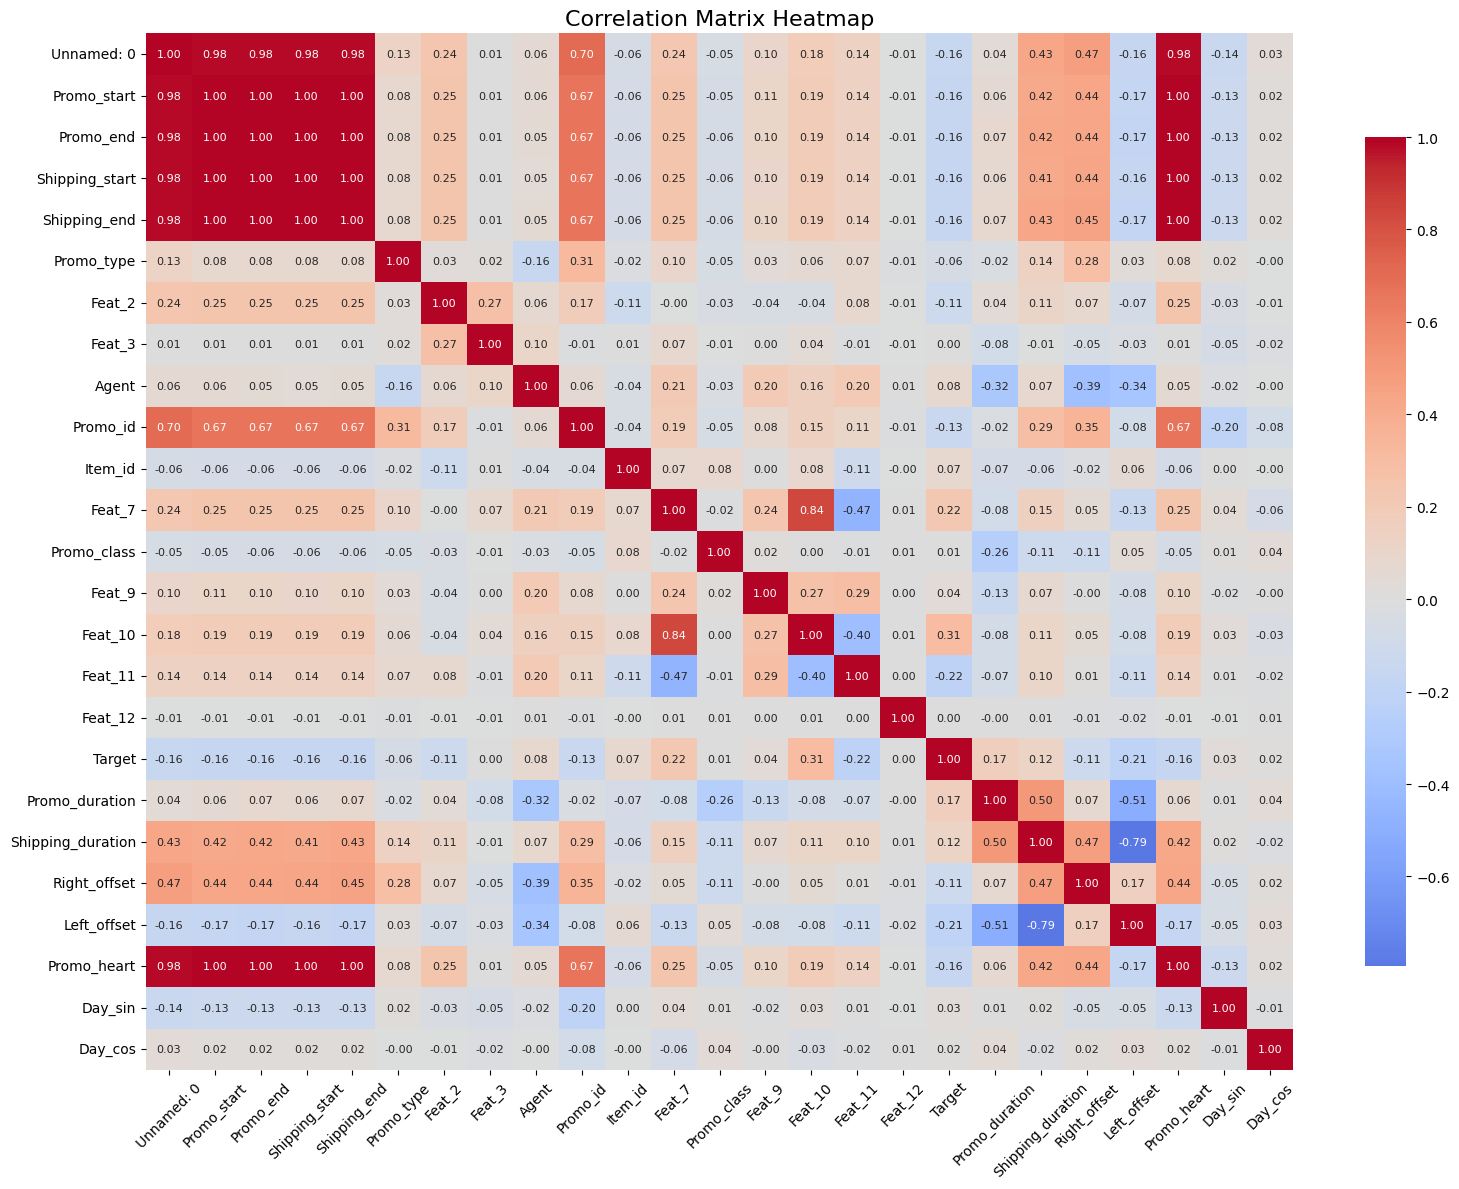

In [779]:
# Вычисляем матрицу корреляций
corr_matrix = df_corr.corr()

# Визуализируем тепловую карту корреляций
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            center=0, annot_kws={"size": 8}, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

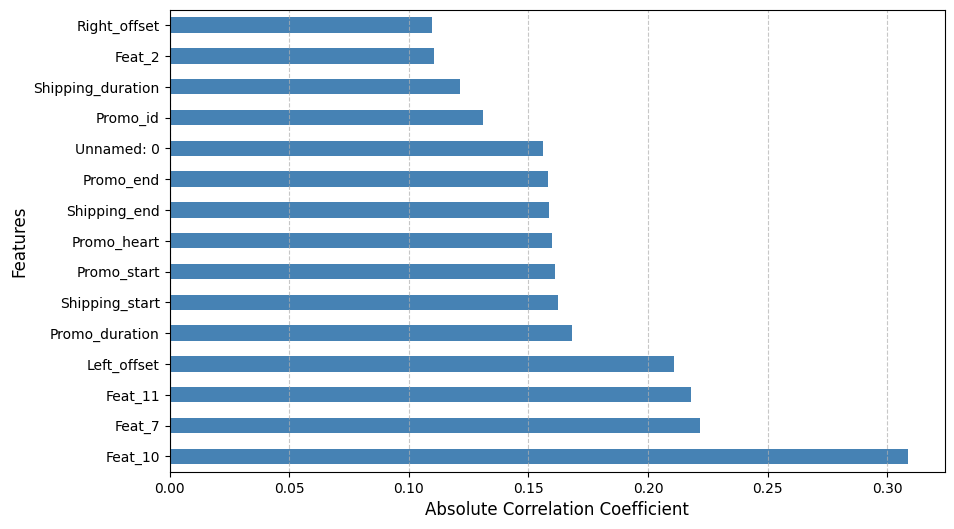

Корреляция признаков с Target:
Target               1.000000
Feat_10              0.308423
Feat_7               0.221565
Feat_11              0.217873
Left_offset          0.210699
Promo_duration       0.168122
Shipping_start       0.162361
Promo_start          0.161098
Promo_heart          0.159668
Shipping_end         0.158702
Promo_end            0.158229
Unnamed: 0           0.156185
Promo_id             0.130909
Shipping_duration    0.121375
Feat_2               0.110418
Right_offset         0.109622
Agent                0.076547
Item_id              0.074646
Promo_type           0.057483
Feat_9               0.039418
Day_sin              0.025884
Day_cos              0.018413
Promo_class          0.009111
Feat_12              0.003010
Feat_3               0.002083


In [780]:
# Сортируем признаки по абсолютной корреляции с Target
target_corr = corr_matrix['Target'].abs().sort_values(ascending=False)

# Визуализируем топ-15 признаков по корреляции с Target
plt.figure(figsize=(10, 6))
target_corr[1:16].plot(kind='barh', color='steelblue')
plt.xlabel('Absolute Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Выводим таблицу корреляций с Target
print("Корреляция признаков с Target:")
print(target_corr.to_string())

In [781]:
# Ищем пары признаков с высокой корреляцией между собой
high_corr_pairs = (corr_matrix.abs()
                   .stack()
                   .reset_index()
                   .rename(columns={0: 'correlation'}))

high_corr_pairs = high_corr_pairs[high_corr_pairs['level_0'] != high_corr_pairs['level_1']]
high_corr_pairs = high_corr_pairs.sort_values(by='correlation', ascending=False)
print("\nТоп-10 пар признаков с высокой корреляцией:")
print(high_corr_pairs.head(20).to_string(index=False))


Топ-10 пар признаков с высокой корреляцией:
       level_0        level_1  correlation
   Promo_heart      Promo_end     0.999968
     Promo_end    Promo_heart     0.999968
   Promo_start    Promo_heart     0.999968
   Promo_heart    Promo_start     0.999968
  Shipping_end      Promo_end     0.999943
     Promo_end   Shipping_end     0.999943
  Shipping_end    Promo_heart     0.999907
   Promo_heart   Shipping_end     0.999907
   Promo_heart Shipping_start     0.999891
Shipping_start    Promo_heart     0.999891
     Promo_end    Promo_start     0.999871
   Promo_start      Promo_end     0.999871
   Promo_start Shipping_start     0.999864
Shipping_start    Promo_start     0.999864
     Promo_end Shipping_start     0.999852
Shipping_start      Promo_end     0.999852
Shipping_start   Shipping_end     0.999845
  Shipping_end Shipping_start     0.999845
   Promo_start   Shipping_end     0.999807
  Shipping_end    Promo_start     0.999807


In [782]:
df_corr.columns

Index(['Unnamed: 0', 'Promo_start', 'Promo_end', 'Shipping_start',
       'Shipping_end', 'Promo_type', 'Feat_2', 'Feat_3', 'Agent', 'Promo_id',
       'Item_id', 'Feat_7', 'Promo_class', 'Feat_9', 'Feat_10', 'Feat_11',
       'Feat_12', 'Target', 'Promo_duration', 'Shipping_duration',
       'Right_offset', 'Left_offset', 'Promo_heart', 'Day_sin', 'Day_cos'],
      dtype='object')

In [783]:
# numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
# df_corr[numeric_cols] = df_corr[numeric_cols].fillna(0)

In [784]:
df_v1 = df_corr.drop(['Unnamed: 0', 'Shipping_start', 'Shipping_end', 'Promo_start', 'Promo_end', 'Promo_heart'], axis=1)
df_catboost = df_catboost.drop(['Unnamed: 0', 'Shipping_start', 'Shipping_end', 'Promo_start', 'Promo_end', 'Promo_heart'], axis=1)

In [785]:
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14081 entries, 0 to 14080
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Promo_type         14081 non-null  int64  
 1   Feat_2             14081 non-null  float64
 2   Feat_3             14081 non-null  float64
 3   Agent              14081 non-null  int64  
 4   Promo_id           14081 non-null  int64  
 5   Item_id            14081 non-null  int64  
 6   Feat_7             14081 non-null  float64
 7   Promo_class        14081 non-null  int64  
 8   Feat_9             14081 non-null  float64
 9   Feat_10            14081 non-null  float64
 10  Feat_11            14081 non-null  float64
 11  Feat_12            14081 non-null  int64  
 12  Target             14081 non-null  int64  
 13  Promo_duration     14081 non-null  int64  
 14  Shipping_duration  14081 non-null  int64  
 15  Right_offset       14081 non-null  int64  
 16  Left_offset        140

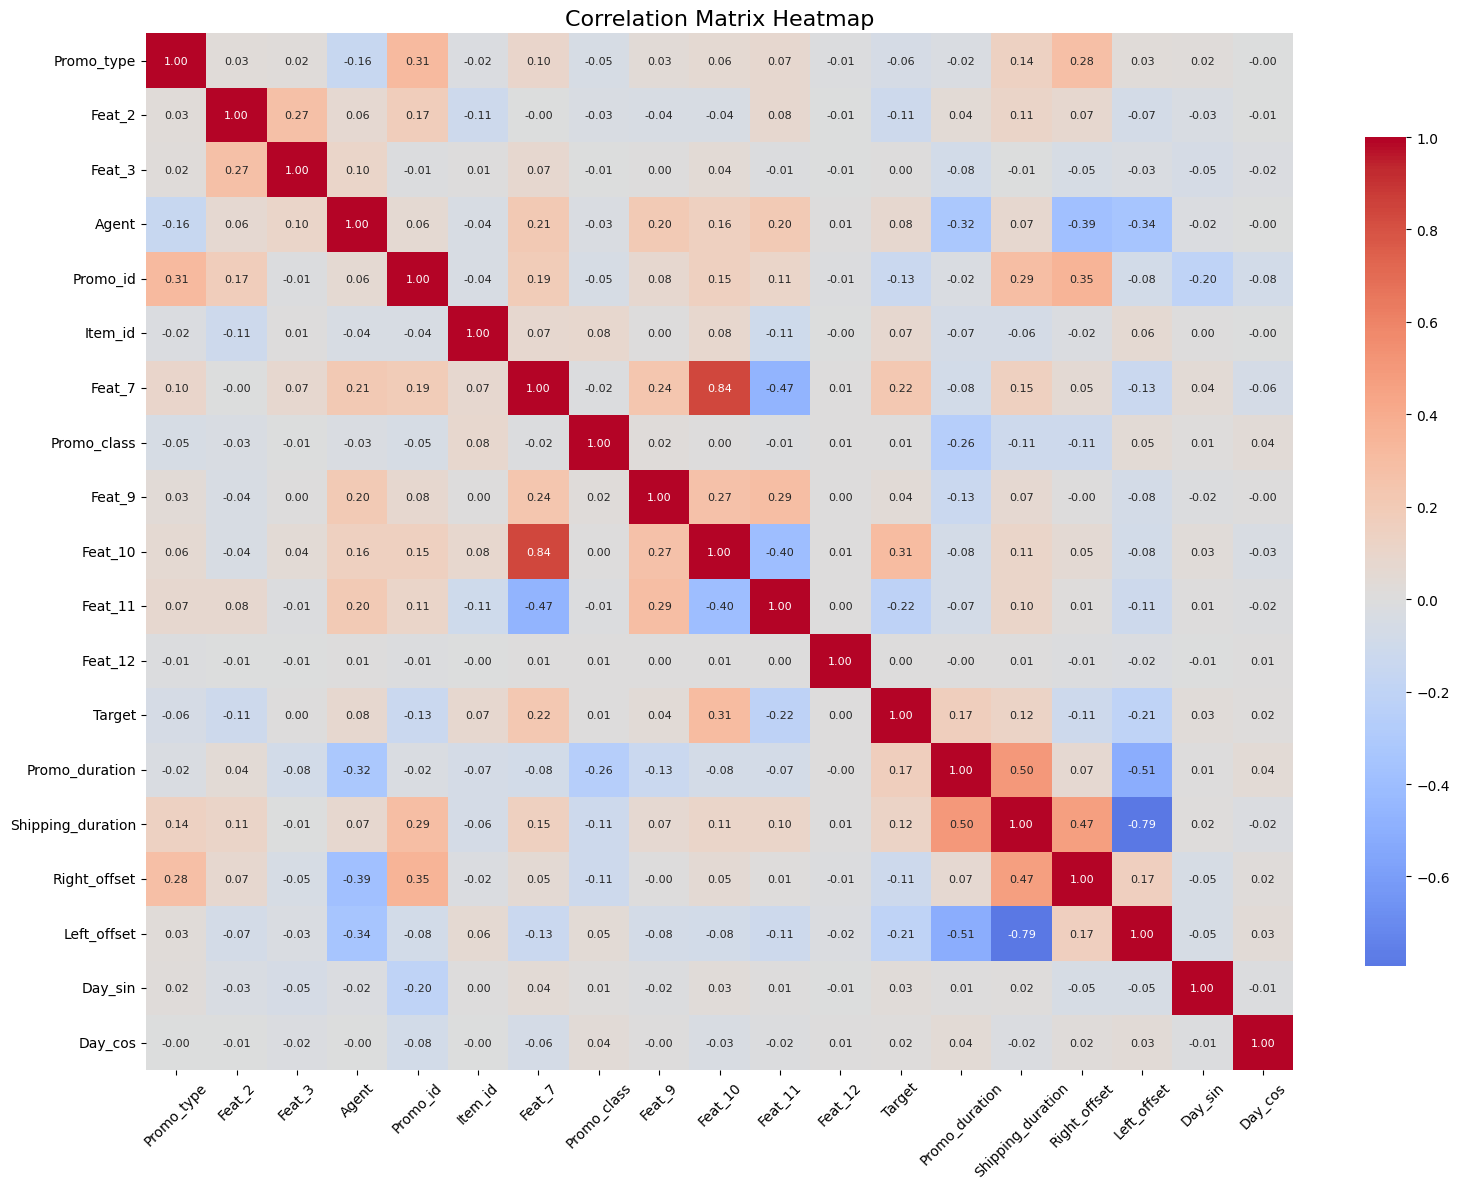

In [786]:
corr_matrix = df_v1.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            center=0, annot_kws={"size": 8}, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [787]:
df_v2 = df_v1.drop(['Feat_7'], axis=1)

In [788]:
df_v2.head(5)

,Promo_type,Feat_2,Feat_3,Agent,Promo_id,Item_id,Promo_class,Feat_9,Feat_10,Feat_11,Feat_12,Target,Promo_duration,Shipping_duration,Right_offset,Left_offset,Day_sin,Day_cos
0,10,8583.448739,33.335849,1,1113,77,2,2.538238e+07,2.682487e+06,19.438395,58379,4102,6,30,3,-27,0.154309,0.988023
1,10,29944.602677,64.447170,1,1001,121,2,2.538238e+07,2.682487e+06,19.438395,73433,13311,6,30,3,-27,0.154309,0.988023
2,10,5474.685269,64.447170,1,1113,131,2,2.538238e+07,2.682487e+06,19.438395,35067,1887,6,30,3,-27,0.154309,0.988023
3,10,8583.448739,33.335849,1,1113,87,2,2.538238e+07,2.682487e+06,19.438395,36550,2346,6,30,3,-27,0.154309,0.988023
4,10,6370.475595,51.994340,1,1113,78,2,2.538238e+07,2.682487e+06,19.438395,30909,4817,6,30,3,-27,0.154309,0.988023


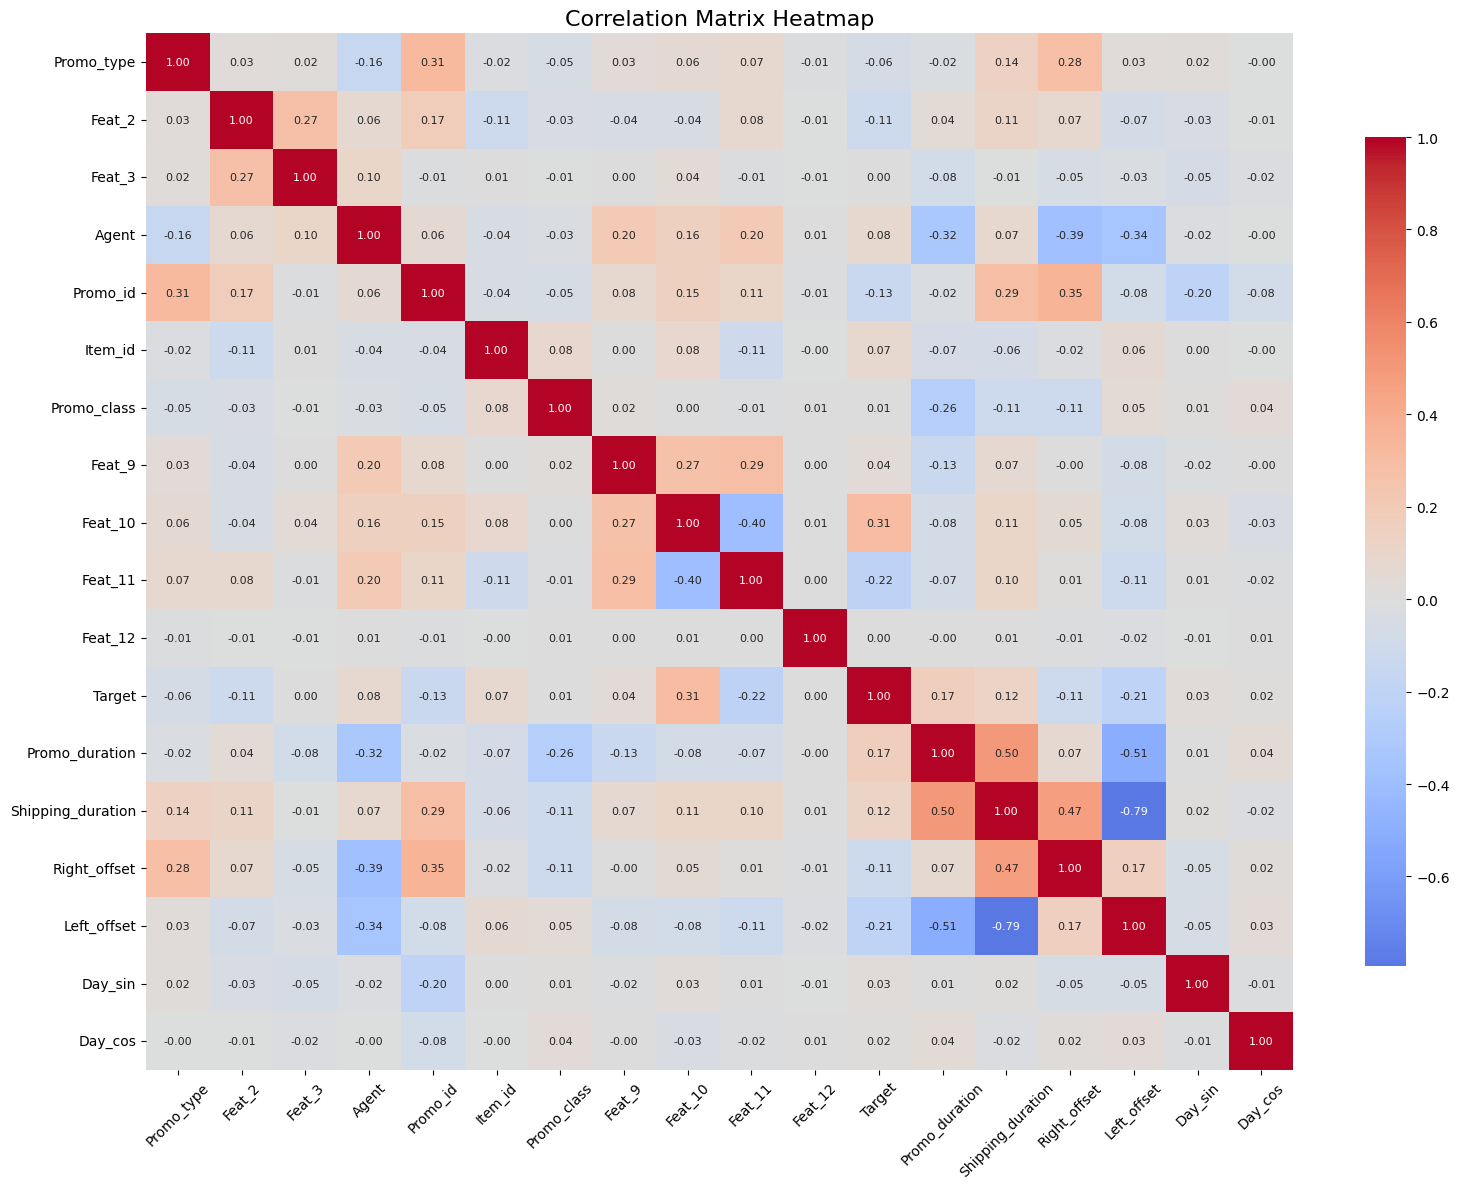

In [789]:
corr_matrix = df_v2.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            center=0, annot_kws={"size": 8}, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

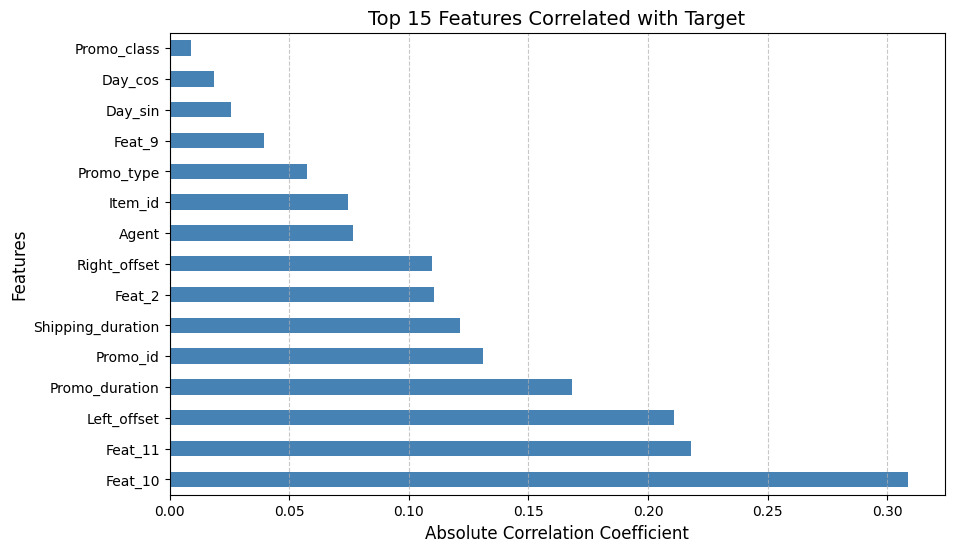

Корреляция признаков с Target:
Target               1.000000
Feat_10              0.308423
Feat_11              0.217873
Left_offset          0.210699
Promo_duration       0.168122
Promo_id             0.130909
Shipping_duration    0.121375
Feat_2               0.110418
Right_offset         0.109622
Agent                0.076547
Item_id              0.074646
Promo_type           0.057483
Feat_9               0.039418
Day_sin              0.025884
Day_cos              0.018413
Promo_class          0.009111
Feat_12              0.003010
Feat_3               0.002083


In [790]:
target_corr = corr_matrix['Target'].abs().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
target_corr[1:16].plot(kind='barh', color='steelblue')
plt.title('Top 15 Features Correlated with Target', fontsize=14)
plt.xlabel('Absolute Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

print("Корреляция признаков с Target:")
print(target_corr.to_string())

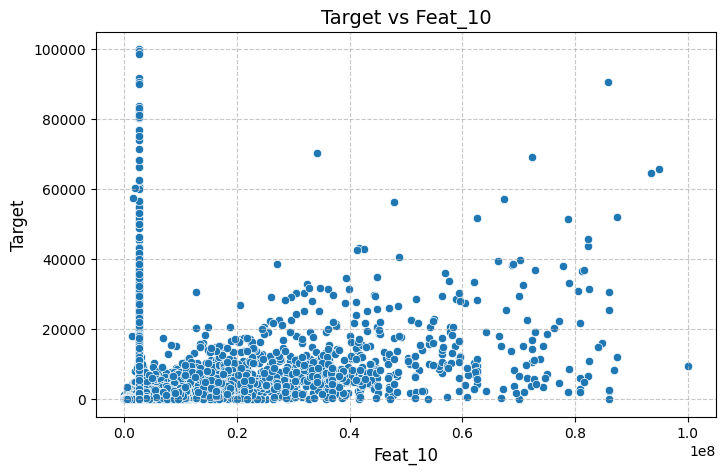

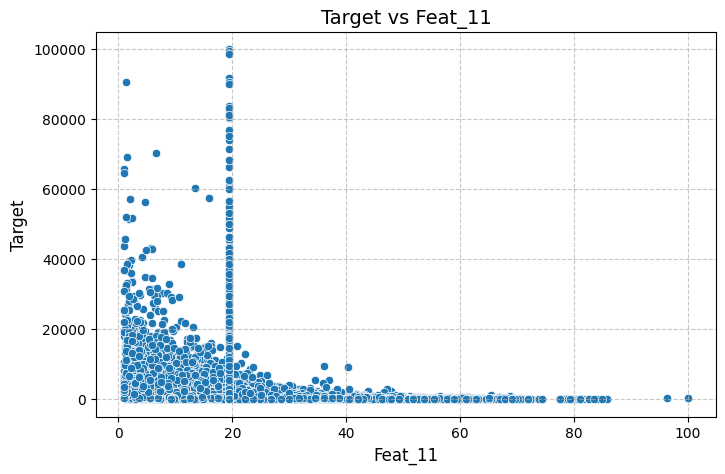

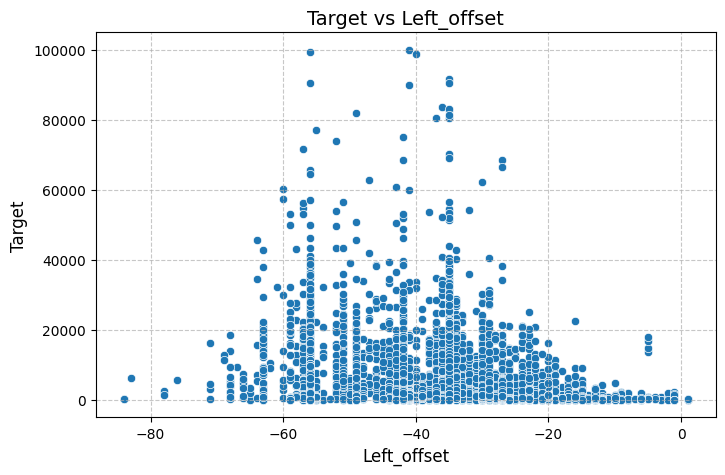

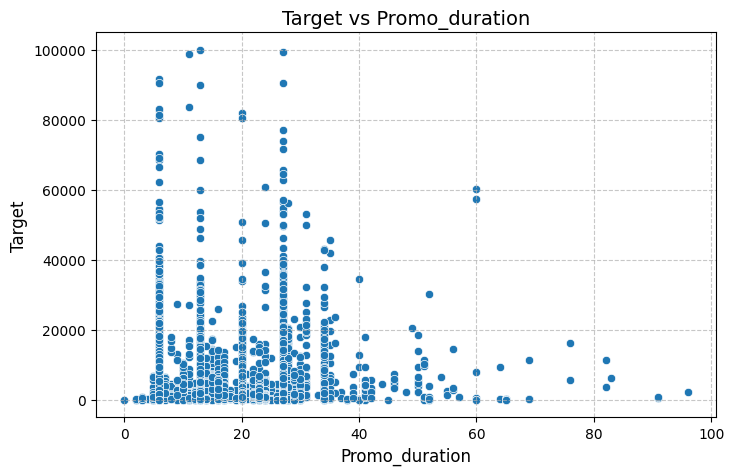

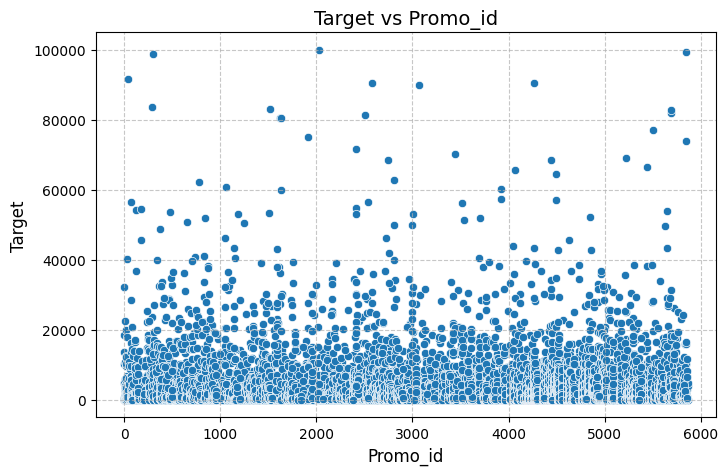

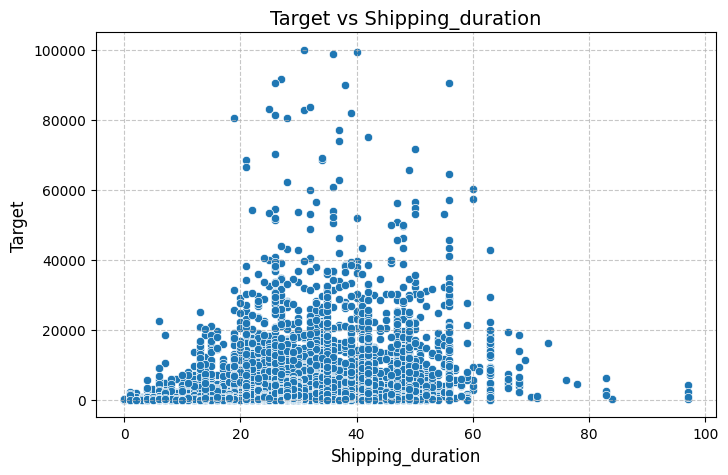

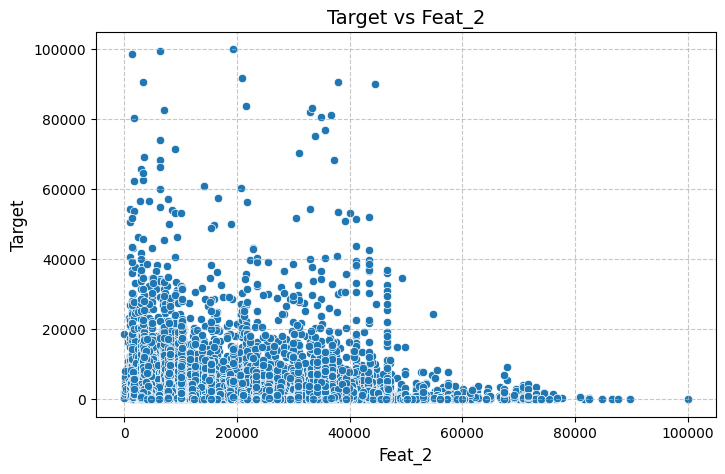

In [791]:
# Для топ-8 признаков по корреляции с Target
top_features = target_corr.index[1:8]

for feature in top_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df_corr[feature], y=df_corr['Target'])
    plt.title(f'Target vs {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Target', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

In [792]:
data = df_v2.copy()
data_catboost = df_catboost.copy()[cat+num+target]

In [793]:
data.head(5)

,Promo_type,Feat_2,Feat_3,Agent,Promo_id,Item_id,Promo_class,Feat_9,Feat_10,Feat_11,Feat_12,Target,Promo_duration,Shipping_duration,Right_offset,Left_offset,Day_sin,Day_cos
0,10,8583.448739,33.335849,1,1113,77,2,2.538238e+07,2.682487e+06,19.438395,58379,4102,6,30,3,-27,0.154309,0.988023
1,10,29944.602677,64.447170,1,1001,121,2,2.538238e+07,2.682487e+06,19.438395,73433,13311,6,30,3,-27,0.154309,0.988023
2,10,5474.685269,64.447170,1,1113,131,2,2.538238e+07,2.682487e+06,19.438395,35067,1887,6,30,3,-27,0.154309,0.988023
3,10,8583.448739,33.335849,1,1113,87,2,2.538238e+07,2.682487e+06,19.438395,36550,2346,6,30,3,-27,0.154309,0.988023
4,10,6370.475595,51.994340,1,1113,78,2,2.538238e+07,2.682487e+06,19.438395,30909,4817,6,30,3,-27,0.154309,0.988023


In [794]:
data_catboost.head(5)

,Promo_type,Promo_class,Agent,Promo_id,Item_id,Feat_2,Feat_3,Feat_7,Feat_9,Feat_10,Feat_11,Feat_12,Day_sin,Day_cos,Left_offset,Right_offset,Promo_duration,Shipping_duration,Target
0,L,D,B,Promo №20.0,Item ID: 22.0,8583.448739,33.335849,NaN,NaN,NaN,NaN,58379,0.154309,0.988023,-27,3,6,30,4102
1,L,D,B,Promo №19.0,Item ID: 62.0,29944.602677,64.447170,NaN,NaN,NaN,NaN,73433,0.154309,0.988023,-27,3,6,30,13311
2,L,D,B,Promo №20.0,Item ID: 71.0,5474.685269,64.447170,NaN,NaN,NaN,NaN,35067,0.154309,0.988023,-27,3,6,30,1887
3,L,D,B,Promo №20.0,Item ID: 31.0,8583.448739,33.335849,NaN,NaN,NaN,NaN,36550,0.154309,0.988023,-27,3,6,30,2346
4,L,D,B,Promo №20.0,Item ID: 23.0,6370.475595,51.994340,NaN,NaN,NaN,NaN,30909,0.154309,0.988023,-27,3,6,30,4817


# ML

In [795]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor, Pool

In [796]:
cat = ['Promo_type', 'Promo_class', 'Agent', 'Promo_id', 'Item_id']
num = ['Feat_2', 'Feat_3', 'Feat_7', 'Feat_9', 'Feat_10', 'Feat_11', 'Feat_12', 'Day_sin', 'Day_cos', 'Left_offset', 'Right_offset', 'Promo_duration', 'Shipping_duration']
target = ['Target']

In [797]:
# data_catboost = data_catboost.drop(['Promo_id', 'Item_id'], axis=1) # - сделает хуже
#data = data.drop(['Promo_id', 'Item_id'], axis=1)

In [823]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = [col for col in numeric_cols if col != 'Target']

# scaler = MinMaxScaler()
# data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [824]:
X = data.drop('Target', axis=1)
y = data['Target']
X_cat = data_catboost.drop('Target', axis=1)
y_cat = data_catboost['Target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=52)

X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(
    X_cat, y_cat, test_size=0.2, random_state=52)

train_pool = Pool(X_cat_train, y_cat_train, cat_features=cat)
test_pool = Pool(X_cat_test, y_cat_test, cat_features=cat)

In [825]:
!pip install catboost

In [827]:
model = CatBoostRegressor(
    iterations=3000,
    learning_rate=0.05,
    depth=8,
    loss_function="RMSE",
    eval_metric="RMSE",
    early_stopping_rounds=50,
    verbose=100
)
model.fit(
    train_pool,
    eval_set=test_pool,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 6472.2753888	test: 6102.4149324	best: 6102.4149324 (0)	total: 116ms	remaining: 5m 47s
100:	learn: 3680.0874882	test: 3992.2585222	best: 3992.2585222 (100)	total: 4.7s	remaining: 2m 14s
200:	learn: 3279.4713406	test: 3874.2761927	best: 3874.2761927 (200)	total: 8.17s	remaining: 1m 53s
300:	learn: 2970.9856865	test: 3838.1745216	best: 3837.2873134 (298)	total: 11.6s	remaining: 1m 44s
400:	learn: 2746.5861032	test: 3821.5985460	best: 3820.0925713 (388)	total: 16.6s	remaining: 1m 47s
500:	learn: 2527.4802924	test: 3798.4856379	best: 3798.2136477 (499)	total: 20.1s	remaining: 1m 40s
600:	learn: 2410.9767146	test: 3785.9025958	best: 3785.9025958 (600)	total: 23.7s	remaining: 1m 34s
700:	learn: 2299.8499583	test: 3777.3583720	best: 3777.3583720 (700)	total: 29.2s	remaining: 1m 35s
800:	learn: 2197.8305354	test: 3768.4468420	best: 3767.6602299 (785)	total: 32.8s	remaining: 1m 30s
900:	learn: 2103.0255170	test: 3761.8874333	best: 3760.5325282 (881)	total: 36.6s	remaining: 1m 25s
1000:

In [812]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
}

In [813]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

results = {}

for name, model_t in models.items():
    model_t.fit(X_train, y_train)
    y_pred = model_t.predict(X_test)

    score = mean_squared_error(y_test, y_pred)
    cv_score = cross_val_score(model_t, X, y, cv=5, scoring='neg_root_mean_squared_error').mean()


    results[name] = {
        'Model': model_t,
        'Score': score,
        'CV Score': cv_score
    }

    print(f"{name}:")
    print(f"Test Score: {score:.4f}")
    print(f"CV Score: {cv_score:.4f}")
    print("----------")

Linear Regression:
Test Score: 32200324.4776
CV Score: -5700.4293
----------
Ridge Regression:
Test Score: 32185658.8055
CV Score: -5698.8527
----------
Random Forest:
Test Score: 22665993.1466
CV Score: -5829.5566
----------
Gradient Boosting:
Test Score: 25559592.8115
CV Score: -5208.9223
----------
XGBoost:
Test Score: 17761912.0000
CV Score: -5401.3549
----------


In [814]:
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.sort_values(by='Score', ascending=False, inplace=True)
print(results_df[['Score', 'CV Score']])

                          Score     CV Score
Linear Regression  3.220032e+07 -5700.429282
Ridge Regression   3.218566e+07 -5698.852705
Gradient Boosting  2.555959e+07 -5208.922324
Random Forest      2.266599e+07 -5829.556606
XGBoost            1.776191e+07 -5401.354932


In [805]:
!pip install optuna

In [806]:
import optuna
import pickle

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 250),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 0.6),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1),
        'objective':'reg:squarederror'
    }

    model_t = XGBRegressor(**params)
    trial.set_user_attr("model", model_t)

    score = cross_val_score(
        model_t,
        X_train,
        y_train,
        cv=5,
        scoring='neg_root_mean_squared_error'
    ).mean()

    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=25)

print("Лучшие параметры:", study.best_params)

[I 2025-04-23 11:21:45,835] A new study created in memory with name: no-name-b4e19a0b-ac9f-4235-8501-490429d88f57
[I 2025-04-23 11:21:48,231] Trial 0 finished with value: -4426.81064453125 and parameters: {'n_estimators': 69, 'max_depth': 7, 'learning_rate': 0.19171861014373873, 'subsample': 0.724422648627513, 'colsample_bytree': 0.8520055874845546, 'gamma': 0.10821849506996002, 'min_child_weight': 8, 'reg_alpha': 0.02926739066121653, 'reg_lambda': 0.6872410000172402}. Best is trial 0 with value: -4426.81064453125.
[I 2025-04-23 11:22:01,042] Trial 1 finished with value: -5041.0361328125 and parameters: {'n_estimators': 221, 'max_depth': 5, 'learning_rate': 0.01618700987453186, 'subsample': 0.7783312797568461, 'colsample_bytree': 0.6187651144495897, 'gamma': 0.13887947079802238, 'min_child_weight': 8, 'reg_alpha': 0.5259128102251192, 'reg_lambda': 0.6342349680600584}. Best is trial 0 with value: -4426.81064453125.
[I 2025-04-23 11:22:05,585] Trial 2 finished with value: -4474.543847656

Лучшие параметры: {'n_estimators': 113, 'max_depth': 9, 'learning_rate': 0.07329735577279145, 'subsample': 0.913531720369278, 'colsample_bytree': 0.6098036527097348, 'gamma': 0.5924954594892826, 'min_child_weight': 1, 'reg_alpha': 0.20867642992293858, 'reg_lambda': 0.5301849089753257}


In [828]:
best_model = study.best_trial.user_attrs["model"]
with open('opt_xgb_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

with open('opt_xgb_model.pkl', 'rb') as f:
    best_opt_model = pickle.load(f)

with open('catboost_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('catboost_model.pkl', 'rb') as f:
    catboost_model = pickle.load(f)

In [829]:
best_opt_model = study.best_trial.user_attrs["model"]
best_opt_model = best_opt_model.fit(X_train, y_train)

In [830]:
mean_squared_error(best_opt_model.predict(X_test), y_test)

17411758.0

In [831]:
mean_squared_error(catboost_model.predict(X_cat_test), y_cat_test)

14072285.915150283

In [811]:
import random
for _ in range(10):
  i = random.randint(0, len(df))
  D = dict(df.drop(["Unnamed: 0", 'Target'], axis=1).iloc[i])
  for key in D.keys():
    if type(D[key]) != str:
      if type(D[key]) == np.int64:
        D[key] = int(D[key])
      elif type(D[key] == pd.Timestamp):
        D[key] = str(D[key])[:-9]
      else:
        D[key] = float(D[key])
  print('"' + str(D).replace('""', '"nan"').replace("\'", '\\\"').replace(' ', '').lower() + '"')

"{\"promo_start\":\"2024-08-15\",\"promo_end\":\"2024-09-11\",\"shipping_start\":\"2024-07-25\",\"shipping_end\":\"2024-09-12\",\"promo_type\":\"g\",\"feat_2\":\"46789.70\",\"feat_3\":\"58.22075\",\"agent\":\"b\",\"promo_id\":\"promo№5594.0\",\"item_id\":\"itemid:116.0\",\"feat_7\":\"5054.031\",\"promo_class\":\"d\",\"feat_9\":\"3248481.\",\"feat_10\":\"440436.1\",\"feat_11\":\"11.16137\",\"feat_12\":72448,\"promo_duration\":27,\"shipping_duration\":49,\"right_offset\":1,\"left_offset\":-48,\"promo_heart\":\"2024-08-28\",\"day_sin\":\"-0.8452490\",\"day_cos\":\"-0.5343725\"}"
"{\"promo_start\":\"2021-09-29\",\"promo_end\":\"2021-10-26\",\"shipping_start\":\"2021-09-12\",\"shipping_end\":\"2021-10-16\",\"promo_type\":\"a\",\"feat_2\":\"25777.05\",\"feat_3\":\"58.22075\",\"agent\":\"c\",\"promo_id\":\"promo№2326.0\",\"item_id\":\"itemid:111.0\",\"feat_7\":\"\",\"promo_class\":\"d\",\"feat_9\":\"\",\"feat_10\":\"\",\"feat_11\":\"\",\"feat_12\":60056,\"promo_duration\":27,\"shipping_durati

In [822]:
df['Target'].describe()

,Target
count,14081.000000
mean,3239.999787
std,6534.079963
min,1.000000
25%,260.000000
50%,1132.000000
75%,3359.000000
max,100000.000000
